# Anime recomendations

## Provisioning

### Data requirements

#### Domain

The target audience for anime can vary widely, as it encompasses a diverse range of genres and themes. However, it is particularly popular among young adults and teenagers. Factors that can influence anime preferences include personal interests, cultural background, and social influences.

Using AI to make personalized recommendations to users presents both challenges and opportunities. One challenge is accurately modeling user preferences and behavior, which can be complex and dynamic. Another challenge is ensuring that the recommendations are diverse and not biased towards certain genres or themes.

On the other hand, AI has the potential to greatly enhance the user experience by providing highly personalized recommendations. By analyzing user data and behavior, AI can identify patterns and make predictions about what a user may enjoy. This can help users discover new content that they may not have found otherwise.

Overall, using AI for anime recommendations presents an exciting opportunity to improve the user experience and help people discover new content that they will enjoy.


### Stakeholders

For my project the stackeholder i will use is in the role of an end user. He is going to provide valuable feedback about the accuracy of the model and if there is anything that needs to be tweeked to make a better product

### Required data elements

In my data set i have the following data elements

    Rank: The rank of the anime in a particular ranking list, based on various criteria such as popularity or ratings.

    Title: The name of the anime series.

    Link: A hyperlink to the webpage or source of the anime.

    Score: The overall rating or score of the anime based on user ratings or other metrics.

    Type: The type of anime, such as TV series, movie, or OVA (Original Video Animation).
    
    Episodes: The total number of episodes in the anime series.

    Source: The source material of the anime, such as manga, light novel, or original work.

    Status: The current status of the anime, such as ongoing, completed, or cancelled.

    Premiered: The season and year in which the anime premiered.

    Aired Date: The specific dates on which the anime was broadcasted.

    Studios: The studio or studios responsible for producing the anime.

    Genres: The different genres that the anime falls under, such as action, comedy, or romance.

    Themes: The main themes or motifs explored in the anime.

    Demographic: The target demographic for the anime, such as shonen (boys) or shojo (girls).

    Duration: The length of each episode in the anime series.

    Age Rating: The age rating of the anime, indicating the appropriate age group for the content.

    Number of Raters: The total number of users who have rated the anime.

    Popularity: A measure of the popularity of the anime on a particular platform or website.

    Members: The number of members or users who have added the anime to their list on a particular platform or website.

    Favorites: The number of users who have marked the anime as their favorite.

    Adaptation: The name of the series that the show adapts.

    Sequel: Indicates whether the anime is a sequel to a previous series.

    Prequel: Indicates whether the anime is a prequel to a future series.

    Characters: The names of the main characters in the anime.

    Role: The role or occupation of the character in the anime.

    Voice Actors: The name of the voice actor who provided the voice for the character.

    Openings: The name of the opening theme song for the anime.

    Opening Artists: The name of the artist or group who performed the opening theme song.

    Endings: The name of the ending theme song for the anime.

    Ending Artists: The name of the artist or group who performed the ending theme song.
    
In my model I will mainly focus on the Genre, Themes and Demographic.

### Data source

The data source I will be using for my model is a scrape of one of the bigest anime websites My Anime List (MAL) which i got from kaggle - https://www.kaggle.com/datasets/gaeranbab/anime2023february24000?select=24000_anime_stats_022123.csv



## Understanding

### Analisys

Import necessary libraries:

In [62]:
#Import necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

#Load the dataset
anime_df = pd.read_csv("Anime.csv")

### Inspect the Data

In [63]:
anime_df.head()


,Unnamed: 0,Rank,Title,Link,Score,Type,# Episodes,Source,Status,Premiered,...,Adaptation,Sequel,Prequel,Characters,Role,Voice Actors,Openings,Opening Artists,Endings,Ending Artists
0,0,1.0,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,9.11,TV,64,Manga,Finished Airing,Spring 2009,...,Fullmetal Alchemist,NaN,NaN,"['Elric, Edward', 'Elric, Alphonse', 'Mustang,...","['Main', 'Main', 'Supporting', 'Supporting', '...","['Park, Romi', 'Kugimiya, Rie', 'Miki, Shinich...","['again', 'Hologram (ホログラム)', 'Golden Time Lov...","['YUI', 'NICO Touches the Walls', 'Sukima Swit...","['Uso (嘘)', 'LET IT OUT', 'Tsunaida Te (つないだ手)...","['SID', 'Miho Fukuhara', ""Lil'B"", 'SCANDAL', '..."
1,1,2.0,Bleach: Sennen Kessen-hen,https://myanimelist.net/anime/41467/Bleach__Se...,9.10,TV,13,Manga,Finished Airing,Fall 2022,...,Bleach,Bleach: Sennen Kessen-hen - Ketsubetsu-tan,Bleach,"['Kurosaki, Ichigo', 'Kuchiki, Rukia', 'Inoue,...","['Main', 'Main', 'Main', 'Main', 'Main', 'Main...","['Morita, Masakazu', 'Orikasa, Fumiko', 'Matsu...",['スカー'],['キタニタツヤ'],"['Rapport', '最果て', 'Number One']","['キタニタツヤ', 'SennaRin', 'Shiro Sagisu, Hazel Fe..."
2,2,3.0,Steins;Gate,https://myanimelist.net/anime/9253/Steins_Gate,9.08,TV,24,Visual novel,Finished Airing,Spring 2011,...,Steins;Gate,Steins;Gate: Oukoubakko no Poriomania,NaN,"['Okabe, Rintarou', 'Makise, Kurisu', 'Shiina,...","['Main', 'Main', 'Main', 'Main', 'Supporting',...","['Miyano, Mamoru', 'Imai, Asami', 'Hanazawa, K...",['Hacking to the Gate'],['Kanako Itou'],['Toki Tsukasadoru Juuni no Meiyaku (刻司ル十二ノ盟約)...,"['Yui Sakakibara', 'Takeshi Abo', 'Kanako Itou..."
3,3,4.0,Gintama°,https://myanimelist.net/anime/28977/Gintama°,9.07,TV,51,Manga,Finished Airing,Spring 2015,...,Gintama,Gintama.,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,"['Sakata, Gintoki', 'Kagura', 'Shimura, Shinpa...","['Main', 'Main', 'Main', 'Supporting', 'Suppor...","['Sugita, Tomokazu', 'Kugimiya, Rie', 'Sakaguc...","['DAY×DAY', 'Pride Kakumei (プライド革命)', 'Saigo m...","['BLUE ENCOUNT', 'CHiCO with HoneyWorks', 'Aqu...","['DESTINY', 'Saigo made II (最後までⅡ)', 'Pride Ka...","['Negoto', 'Aqua Timez', 'CHiCO with HoneyWork..."
4,4,5.0,Kaguya-sama wa Kokurasetai: Ultra Romantic,https://myanimelist.net/anime/43608/Kaguya-sam...,9.07,TV,13,Manga,Finished Airing,Spring 2022,...,Kaguya-sama wa Kokurasetai: Tensai-tachi no Re...,Kaguya-sama wa Kokurasetai: First Kiss wa Owar...,Kaguya-sama wa Kokurasetai? Tensai-tachi no Re...,"['Shinomiya, Kaguya', 'Ishigami, Yuu', 'Fujiwa...","['Main', 'Main', 'Main', 'Main', 'Main', 'Supp...","['Koga, Aoi', 'Suzuki, Ryouta', 'Kohara, Konom...",['GIRI GIRI feat Suu (GIRI GIRI feat. すぅ)'],['Masayuki Suzuki'],"['GIRI GIRI feat Suu (GIRI GIRI feat. すぅ)', 'H...","['Masayuki Suzuki', 'Airi Suzuki', 'Miyuki Shi..."


In [64]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        24000 non-null  int64  
 1   Rank              22122 non-null  float64
 2   Title             24000 non-null  object 
 3   Link              24000 non-null  object 
 4   Score             15215 non-null  float64
 5   Type              23976 non-null  object 
 6   # Episodes        23976 non-null  object 
 7   Source            23976 non-null  object 
 8   Status            23976 non-null  object 
 9   Premiered         7477 non-null   object 
 10  Aired Date        23976 non-null  object 
 11  Studios           23976 non-null  object 
 12  Genres            19326 non-null  object 
 13  Themes            13168 non-null  object 
 14  Demographic       9287 non-null   object 
 15  Duration          23976 non-null  object 
 16  Age Rating        23976 non-null  object

In [65]:
anime_df.describe()

,Unnamed: 0,Rank,Score,Number of Raters
count,24000.000000,22122.000000,15215.000000,1.519500e+04
mean,11999.500000,11061.500000,6.420585,2.949366e+04
std,6928.347566,6386.215663,0.905455,1.144013e+05
min,0.000000,1.000000,1.850000,1.000000e+02
25%,5999.750000,5531.250000,5.790000,3.950000e+02
50%,11999.500000,11061.500000,6.420000,1.807000e+03
75%,17999.250000,16591.750000,7.080000,1.094600e+04
max,23999.000000,22122.000000,9.110000,2.595062e+06


In [66]:
anime_df.shape

(24000, 31)

## Missing Data Analysis

In [67]:

missing_percentages = anime_df.isnull().sum() / len(anime_df) * 100
print(missing_percentages)

Unnamed: 0           0.000000
Rank                 7.825000
Title                0.000000
Link                 0.000000
Score               36.604167
Type                 0.100000
# Episodes           0.100000
Source               0.100000
Status               0.100000
Premiered           68.845833
Aired Date           0.100000
Studios              0.100000
Genres              19.475000
Themes              45.133333
Demographic         61.304167
Duration             0.100000
Age Rating           0.100000
Number of Raters    36.687500
Popularity           0.100000
Members              0.100000
Favorites            0.100000
Adaptation          75.641667
Sequel              82.891667
Prequel             82.958333
Characters           0.000000
Role                 0.000000
Voice Actors         0.000000
Openings             0.100000
Opening Artists      0.100000
Endings              0.100000
Ending Artists       0.100000
dtype: float64


## Vizualisation

### Number of shows based on type:

<Axes: >

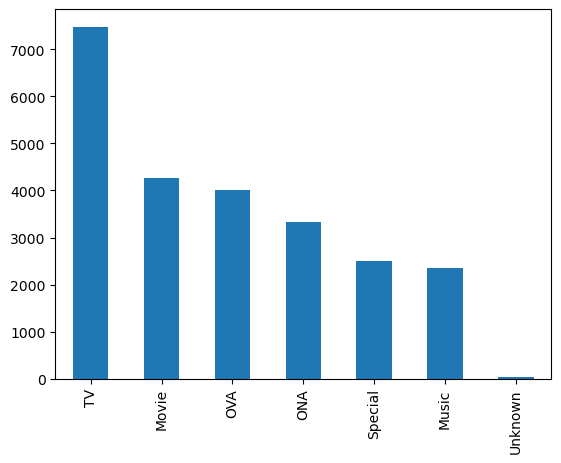

In [68]:
anime_df['Type'].value_counts().plot(kind='bar')

### Number of shows based on their source:

<Axes: >

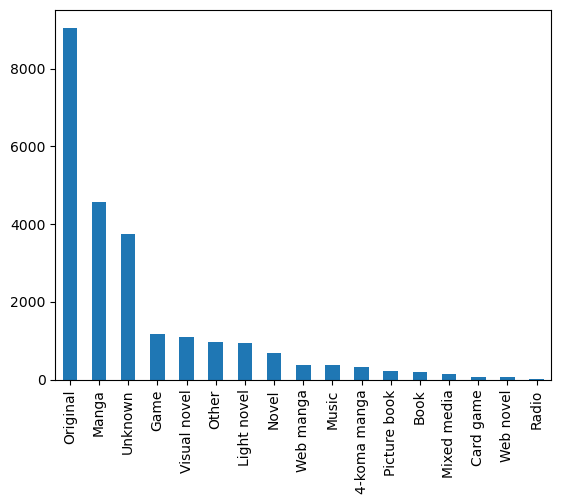

In [69]:
anime_df['Source'].value_counts().plot(kind='bar')

### Distribution of score for all the series:

<Axes: xlabel='Score', ylabel='Count'>

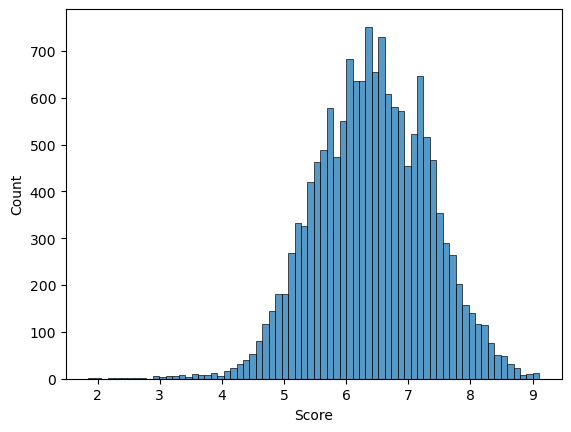

In [70]:
sns.histplot(anime_df['Score'])

### Distribution of scores for each anime type:

<Axes: xlabel='Type', ylabel='Score'>

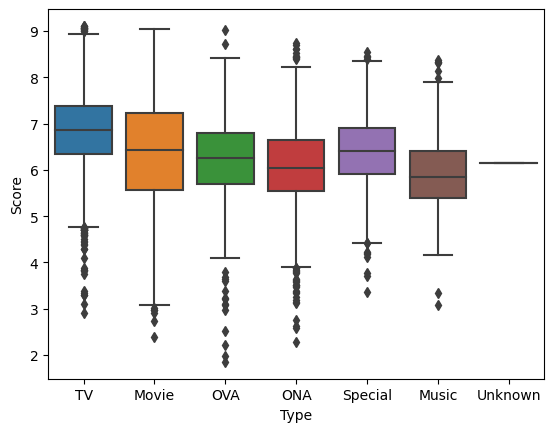

In [71]:
sns.boxplot(x='Type', y='Score', data=anime_df)

### Conclusion

The preliminary analysis of the anime dataset provides some valuable insights; however, there are certain factors to consider when drawing conclusions from the data. First, a significant portion of the dataset contains missing data, which may hinder the effectiveness of predictions or recommendations based on this data. To address this limitation, it may be necessary to explore additional data sources or techniques.

Additionally, certain types of anime (such as "Special", "Music", and "Unknown") may not be suitable for making recommendations, as they are not full series but rather side content. Therefore, it is advised to exclude these types of anime from any subsequent analysis.

Another crucial observation is the importance of the anime score in making recommendations. Lower-scoring anime may not be of interest to viewers, so removing entries with low scores from the dataset may improve recommendation accuracy.

In summary, while this initial analysis provides some useful insights, further investigation is needed to determine the most effective approach for making recommendations based on this dataset. Nonetheless, these initial observations provide a solid foundation for further exploration and analysis.

## Data Preparation



### Remove necesery collums

In [72]:

#Remove unnecessary columns:
anime_df = anime_df.drop(['Number of Raters', 'Popularity', 'Members', 'Favorites', 'Adaptation', 'Sequel', 
                          'Prequel', 'Characters', 'Role', 'Voice Actors', 'Openings', 'Opening Artists', 'Endings',
                          'Ending Artists'], axis=1)

### Remove Special, Music, and Unknown types

In [73]:
anime_df = anime_df[~anime_df['Type'].isin(['Special', 'Music', 'Unknown'])]

### Replace "Unknown" with NaN for object type columns and 0 for numeric type columns

In [74]:
anime_df = anime_df.replace("Unknown", np.nan)

for col in anime_df.columns:
    if anime_df[col].dtype == object:
        anime_df[col] = anime_df[col].fillna('unknown')
    else:
        anime_df[col] = anime_df[col].fillna(0)


### Remove entries with a status of 'Not yet aired'

In [75]:
anime_df = anime_df[anime_df['Status'] != 'Not yet aired']

### Remove inappropriate entries

In [76]:
anime_df = anime_df[~anime_df['Genres'].str.contains('Hentai')]
anime_df = anime_df[~anime_df['Genres'].str.contains('Erotica')]

### Replace 'unknown' values with an empty string in the 'Themes' column

In [77]:
anime_df['Themes'] = anime_df['Themes'].replace("unknown", "")


### Function to clean duration strings

In [78]:



def clean_duration(duration_str):
    # If the duration is unknown, return NaN
    if duration_str == 'Unknown':
        return float('nan')
    
    # Extract the numerical values from the duration string
    duration_regex = re.compile(r'(\d+)\s*(hr\.\s*)?(\d+)\s*min\.')
    match = duration_regex.search(duration_str)
    if match:
        hours = int(match.group(1)) if match.group(1) else 0
        minutes = int(match.group(3))
        total_duration = hours * 60 + minutes
        # If there are no hours, assume it's an episodic show and return the duration per episode
        if hours == 0:
            per_ep_regex = re.compile(r'(\d+)\s*min\.\s*per\s*ep\.')
            per_ep_match = per_ep_regex.search(duration_str)
            if per_ep_match:
                return int(per_ep_match.group(1))
        # Otherwise, return the total duration in minutes
        else:
            return total_duration
    
    # If we couldn't extract a duration value, return NaN
    return float('nan')


# Apply the clean_duration function to the Duration column
anime_df['Duration'] = anime_df['Duration'].apply(clean_duration)


# Remove any rows with a duration of less than 10 minutes
anime_df = anime_df[anime_df['Duration'] >= 10]


### Displaying the cleaned dataframe

In [79]:
anime_df

,Unnamed: 0,Rank,Title,Link,Score,Type,# Episodes,Source,Status,Premiered,Aired Date,Studios,Genres,Themes,Demographic,Duration,Age Rating
0,0,1.0,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,9.11,TV,64,Manga,Finished Airing,Spring 2009,"Apr 5, 2009 to Jul 4, 2010",Bones,"Action,Adventure,Drama,Fantasy,","Military,",Shounen,124.0,R - 17+ (violence & profanity)
1,1,2.0,Bleach: Sennen Kessen-hen,https://myanimelist.net/anime/41467/Bleach__Se...,9.10,TV,13,Manga,Finished Airing,Fall 2022,"Oct 11, 2022 to Dec 27, 2022",Pierrot,"Action,Adventure,Fantasy,",,Shounen,124.0,R - 17+ (violence & profanity)
2,2,3.0,Steins;Gate,https://myanimelist.net/anime/9253/Steins_Gate,9.08,TV,24,Visual novel,Finished Airing,Spring 2011,"Apr 6, 2011 to Sep 14, 2011",White Fox,"Drama,Sci-Fi,Suspense,","Psychological,Time Travel,",unknown,124.0,PG-13 - Teens 13 or older
3,3,4.0,Gintama°,https://myanimelist.net/anime/28977/Gintama°,9.07,TV,51,Manga,Finished Airing,Spring 2015,"Apr 8, 2015 to Mar 30, 2016",Bandai Namco Pictures,"Action,Comedy,Sci-Fi,","Gag Humor,Historical,Parody,Samurai,",Shounen,124.0,PG-13 - Teens 13 or older
4,4,5.0,Kaguya-sama wa Kokurasetai: Ultra Romantic,https://myanimelist.net/anime/43608/Kaguya-sam...,9.07,TV,13,Manga,Finished Airing,Spring 2022,"Apr 9, 2022 to Jun 25, 2022",A-1 Pictures,"Comedy,Romance,","School,",Seinen,123.0,PG-13 - Teens 13 or older
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22112,22112,22113.0,Zukkoke Sannin-gumi no Jitensha Kyoushitsu,https://myanimelist.net/anime/35099/Zukkoke_Sa...,0.00,OVA,1,Other,Finished Airing,unknown,2016,"None found, add some","Drama,","Educational,",Kids,64.0,G - All Ages
22113,22113,22114.0,Zukkoke Sannin-gumi no Koutsuu Anzen,https://myanimelist.net/anime/35149/Zukkoke_Sa...,0.00,OVA,1,unknown,Finished Airing,unknown,Not available,"None found, add some","Drama,","Educational,",Kids,62.0,G - All Ages
22115,22115,22116.0,Zukkoke Sannin-gumi: Zukkoke Jikuu Bouken,https://myanimelist.net/anime/18967/Zukkoke_Sa...,0.00,OVA,1,unknown,Finished Airing,unknown,"Apr 1, 1988","None found, add some","Comedy,Sci-Fi,","Historical,",unknown,307.0,PG-13 - Teens 13 or older
22119,22119,22120.0,Zuqiu Jianghu,https://myanimelist.net/anime/45187/Zuqiu_Jianghu,0.00,ONA,26,Original,Finished Airing,unknown,"May 31, 2017 to Nov 22, 2017","None found, add some","Sports,","Team Sports,",unknown,64.0,G - All Ages


## Modeling

### First version

in this version I made a model that recomends anime based on one show. Overall its recomendations are good and do the job.

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.feature_extraction.text import TfidfVectorizer


# Concatenate the genre and themes columns into a single column of strings
anime_df['genres_themes'] = anime_df['Genres'].fillna('') + ' ' + anime_df['Themes'].fillna('')

# We'll use the TfidfVectorizer from scikit-learn to convert the genres and themes columns into a sparse matrix of TF-IDF features. 
# This will allow us to compute the cosine similarity between each anime based on their genre and theme information.
tfidf = TfidfVectorizer()
genre_theme_matrix = tfidf.fit_transform(anime_df['genres_themes'])

# Now, we can compute the cosine similarity between each anime using the genre and theme matrix:
cosine_sim = cosine_similarity(genre_theme_matrix, genre_theme_matrix)

#Finally, we can define a function that takes an anime title as input and returns a list of top 10 recommended anime based on cosine similarity:

def get_recommendations(title, cosine_sim=cosine_sim, df=anime_df):
    idx = df.loc[df['Title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    anime_indices = [i[0] for i in sim_scores]
    return df['Title'].iloc[anime_indices].tolist()

get_recommendations('Chainsaw Man')



['Goblin Slayer',
 'Peach Boy Riverside',
 'Devil May Cry',
 'Dorohedoro',
 'Kite Liberator',
 'Akame ga Kill!',
 'Vinland Saga Season 2',
 'Vinland Saga',
 'Mad★Bull 34',
 'Violence Jack: Jigoku Gai-hen']

### Second version

In this version I iteretad on the previous part and added the ability to add multiple shows and score them based on how you liked them.

In [81]:
import numpy as np

def get_weighted_recommendations(user_animes, user_scores, cosine_sim=cosine_sim, df=anime_df, k=10):
    # Get the indices of the user's animes
    anime_indices = [df.loc[df['Title'] == title].index[0] for title in user_animes]

    # Calculate the weighted cosine similarity for each anime based on user scores
    weighted_cosine_sim = np.dot(cosine_sim[anime_indices].T, user_scores)

    # Get the top K most similar animes
    top_indices = np.argsort(-weighted_cosine_sim)[:k+len(anime_indices)]

    # Filter out the animes already in the user's list
    top_indices = [idx for idx in top_indices if idx not in anime_indices][:k]

    return df['Title'].iloc[top_indices].tolist()

# Example usage:
user_animes = ['Chainsaw Man', 'Fullmetal Alchemist: Brotherhood', 'Darker than Black: Kuro no Keiyakusha', 'Death Note', 'Naruto', 'One Piece', 'Sword Art Online', 'Hunter x Hunter']
user_scores = [9, 10, 8, 7, 6, 7, 6, 10]

recommendations = get_weighted_recommendations(user_animes, user_scores)

# Print each recommendation on a new line
for i, anime in enumerate(recommendations, start=1):
    print(f"{i}. {anime}")



1. Tsubasa Chronicle: Tori Kago no Kuni no Himegimi
2. One Piece Movie 06: Omatsuri Danshaku to Himitsu no Shima
3. Pokemon Movie 08: Mew to Hadou no Yuusha Lucario
4. Pokemon Movie 09: Pokemon Ranger to Umi no Ouji Manaphy
5. Hanasaku Kizuna no Romantan
6. Dungeon ni Deai wo Motomeru no wa Machigatteiru Darou ka Movie: Orion no Ya
7. Chi Jian Chuanqi
8. Gyouten Ningen Batsealer
9. Merc Storia: Mukiryoku no Shounen to Bin no Naka no Shoujo
10. Naruto: Shippuuden Movie 1


## Third version

For this version I tried a different model to see if the results will be different.

In [82]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, MultiLabelBinarizer
from sklearn.neighbors import NearestNeighbors

# Load the dataset
data = anime_df

# Drop irrelevant columns
data = data.drop(['Unnamed: 0', 'Rank', 'Link', 'Aired Date'], axis=1)


# Create a title mapping DataFrame
title_mapping = data[['Title']].reset_index()

# Replace 'unknown' values with np.nan
data = data.replace('unknown', np.nan)

# Convert numerical columns to float type and fill missing values with column median
numerical_features = ['Score', '# Episodes', 'Duration']
for feature in numerical_features:
    data[feature] = data[feature].astype(float)
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].median())

# Normalize numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Encode categorical features
categorical_features = ['Type', 'Source', 'Status', 'Premiered', 'Studios', 'Demographic', 'Age Rating']
encoder = LabelEncoder()
for feature in categorical_features:
    data[feature] = encoder.fit_transform(data[feature].astype(str))

# Encode 'Genres' and 'Themes' columns using MultiLabelBinarizer
multilabel_features = ['Genres', 'Themes']

for feature in multilabel_features:
    data[feature] = data[feature].apply(lambda x: [item.strip() for item in str(x).split(',')] if not pd.isna(x) else [])
    mlb = MultiLabelBinarizer()
    encoded_feature = mlb.fit_transform(data[feature])
    encoded_df = pd.DataFrame(encoded_feature, columns=[f"{feature}_{c}" for c in mlb.classes_])
    data = data.drop([feature], axis=1)
    data = pd.concat([data, encoded_df], axis=1)

    
    
    
# Remove any remaining string columns
data = data.select_dtypes(exclude=['object'])

# Fill NaN values with 0
data = data.fillna(0)


# Train the KNN model
X = data
knn = NearestNeighbors(n_neighbors=10, metric='cosine')
knn.fit(X)

def get_recommendations(title, knn_model=knn, df=anime_df, k=10):
    idx = df.loc[df['Title'] == title].index[0]
    distances, indices = knn_model.kneighbors(X.loc[idx].values.reshape(1, -1), n_neighbors=k + 1)
    anime_indices = indices[0][1:]
    return df['Title'].iloc[anime_indices].tolist()


# Test the model
title = 'Chainsaw Man'
recommendations = get_recommendations(title)

# Print each recommendation on a new line
for i, anime in enumerate(recommendations, start=1):
    print(f"{i}. {anime}")



1. Houkago Saikoro Club
2. Ashita no Joe
3. Jujutsu Kaisen
4. Sasurai no Taiyou
5. Kyuuketsuki Sugu Shinu
6. Kishuku Gakkou no Juliet
7. Bakuman. 2nd Season
8. Mushikaburi-hime
9. Tsurune: Kazemai Koukou Kyuudou-bu
10. Ashita e Free Kick


C:\Users\petro\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


### Fourth version

In this version I modified the previous version to take multiple shows and scores into account when recomending.

In [83]:
def get_weighted_recommendations(user_animes, user_scores, knn_model=knn, df=anime_df, X=data, k=10):
    # Get the indices of the user's animes
    anime_indices = [df.loc[df['Title'] == title].index[0] for title in user_animes]

    # Calculate the weighted cosine similarity for each anime based on user scores
    weighted_cosine_sim = np.zeros(X.shape[0])
    for idx, score in zip(anime_indices, user_scores):
        distances, indices = knn_model.kneighbors(X.loc[idx].values.reshape(1, -1), n_neighbors=k + 1)
        weighted_cosine_sim[indices[0]] += (1 - distances[0]) * score

    # Get the top K most similar animes
    top_indices = np.argsort(-weighted_cosine_sim)[:k+len(anime_indices)]

    # Filter out the animes already in the user's list
    top_indices = [idx for idx in top_indices if idx not in anime_indices][:k]

    return df['Title'].iloc[top_indices].tolist()

# Example usage:
user_animes = ['Chainsaw Man', 'Fullmetal Alchemist: Brotherhood', 'Darker than Black: Kuro no Keiyakusha',
               'Death Note', 'Naruto', 'One Piece', 'Sword Art Online', 'Hunter x Hunter']
user_scores = [10.0, 8.0, 9.5, 7.0, 6.0, 9.0, 2.5, 7.5]
recommendations = get_weighted_recommendations(user_animes, user_scores)

# Print each recommendation on a new line
for i, anime in enumerate(recommendations, start=1):
    print(f"{i}. {anime}")


1. Onegai☆Twins
2. Hunter x Hunter
3. Naruto
4. Houkago Saikoro Club
5. Ashita no Joe
6. Jujutsu Kaisen
7. Sasurai no Taiyou
8. Kyuuketsuki Sugu Shinu
9. Kishuku Gakkou no Juliet
10. Bakuman. 2nd Season


C:\Users\petro\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\petro\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\petro\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\petro\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\petro\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\petro\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not ha

### Conclusion

Upon evaluating the various recommendation models developed, it is evident that some models outperform others in terms of user satisfaction. A diverse group of users was invited to test the models and provide valuable feedback. The majority of users expressed a preference for the recommendation system that focused on suggesting similar anime titles based on a single input show, with the first model being particularly popular.

Interestingly, the fourth model, which takes into account multiple input shows and their corresponding user scores, also received favorable feedback. This model demonstrated its ability to provide more personalized recommendations by considering user preferences across a range of shows. The positive reception of both the first and fourth models highlights their potential as effective and user-centric recommendation systems.

In conclusion, the project successfully explored different models for recommending anime titles, with the first and fourth models demonstrating the highest user satisfaction. These models, prioritizing recommendations based on a single show and multiple shows with associated scores, respectively, can serve as a solid foundation for further refinement and optimization in order to create a more robust and personalized recommendation system.